<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D1%81%D1%82%D1%83%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B2_%D0%B2%D1%83%D0%B7_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Баллы GRE (из 340 )
Баллы TOEFL (из 120 )
Рейтинг университета (из 5)
Заявление о цели (SOP) и рекомендательное письмо (LOR) Сила (из 5 )
Средний балл бакалавра (из 10 )
Опыт исследовательской работы (0 или 1 )
Шанс поступления (в диапазоне от 0 до 1).

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
# Clear any logs from previous runs
rm -rf ./logs/

In [ ]:
df = pd.read_csv('/content/adm_data.csv')

In [ ]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.rename(columns = {'Serial No.' : 'Serial_No','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit ':'chance_admit'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   chance_admit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,chance_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
SAMPLE_SIZE =  400#@param
  
train_dive = df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('chance_admit')
test_labels = test_features.pop('chance_admit')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[198.12187    316.45627    107.29063      3.0531251    3.3734372
    3.43125      8.586407     0.54687494]]


In [ ]:
horsepower = np.array(train_features['CGPA'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 173ms/step


array([[ 0.04403295],
       [-0.02266769],
       [-0.28947026],
       [ 0.5442886 ],
       [-0.23944359],
       [ 0.8110911 ],
       [-0.17274295],
       [ 0.8277667 ],
       [-1.2899799 ],
       [-1.3900317 ]], dtype=float32)

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['CGPA'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.92 s, sys: 195 ms, total: 4.12 s
Wall time: 4.56 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.053725,0.054407,95
96,0.057700,0.055936,96
97,0.055297,0.055261,97
98,0.053488,0.055872,98
99,0.054770,0.056566,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [chance_admit]')
  plt.legend()
  plt.grid(True)

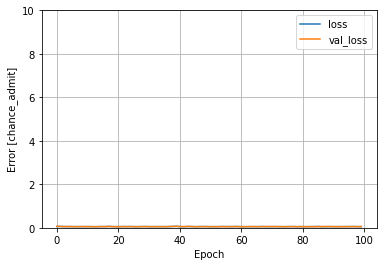

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['CGPA'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 6ms/step


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['CGPA'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('CGPA')
  plt.ylabel('chance_admit')
  plt.legend()

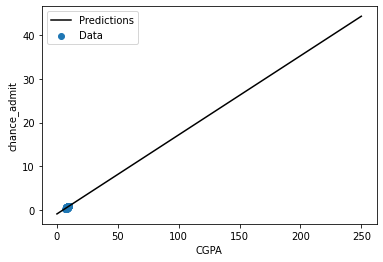

In [ ]:
plot_horsepower(x, y)

Линейная регрессия с несколькими входами

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 55ms/step


array([[ 0.72404116],
       [ 0.7150806 ],
       [-0.4718502 ],
       [ 0.1693351 ],
       [-0.8039133 ],
       [-0.28726912],
       [ 0.48093078],
       [-0.73370886],
       [ 1.1086928 ],
       [ 0.3202599 ]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_19/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[-0.43515804],
       [-0.28627402],
       [ 0.7261125 ],
       [ 0.33503175],
       [ 0.5027528 ],
       [-0.5699543 ],
       [-0.20531613],
       [ 0.04207981]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.32 s, sys: 150 ms, total: 4.47 s
Wall time: 5.74 s


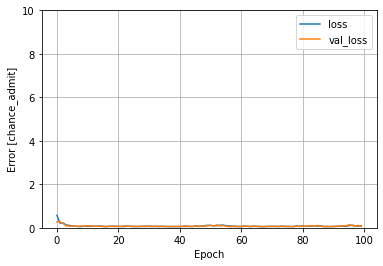

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.9.2


In [ ]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-2h1fy93v
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-2h1fy93v
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184426 sha256=6bcfb056b66b75437edb78d5c6f20f7dfc3e202564422672f4d54b7a2585f103
  Stored in directory: /tmp/pip-ephem-wheel-cache-luyxcj3x/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
gz = tf.keras.utils.get_file('/content/archive (24).zip')

NameError: ignored